# Kernel Ridge (RBF) para Predicción de Humedad (_2)
Este notebook implementa Kernel Ridge Regression (con kernel RBF) para predecir humedad, usando escalado adecuado de variables. Incluye todas las curvas y métricas relevantes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve, validation_curve, cross_val_score
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Cargar el dataset
dataset = pd.read_csv('../dataset/ML1_temperature.xlsx - Hoja1.csv', decimal=',')
x = dataset.drop(['recnt_Humidity','recnt_Temperature'], axis=1).values
y = dataset['recnt_Humidity'].values.reshape(-1, 1)

In [3]:
# Escalar X e y
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_scaled = scaler_x.fit_transform(x)
y_scaled = scaler_y.fit_transform(y)

In [4]:
# Separar en entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

## Curva de aprendizaje
Muestra cómo varía el error (MSE) al predecir humedad según el tamaño del conjunto de entrenamiento.

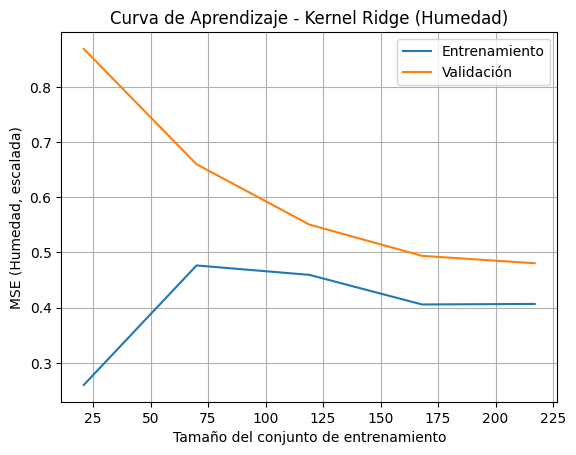

In [5]:
train_sizes, train_scores, val_scores = learning_curve(KernelRidge(kernel='rbf', gamma=0.1), x_train, y_train.ravel(), cv=5, scoring='neg_mean_squared_error')
plt.plot(train_sizes, -train_scores.mean(axis=1), label='Entrenamiento')
plt.plot(train_sizes, -val_scores.mean(axis=1), label='Validación')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('MSE (Humedad, escalada)')
plt.title('Curva de Aprendizaje - Kernel Ridge (Humedad)')
plt.legend()
plt.grid(True)
plt.show()

## Curva de validación
Muestra el desempeño del modelo para diferentes valores de gamma.

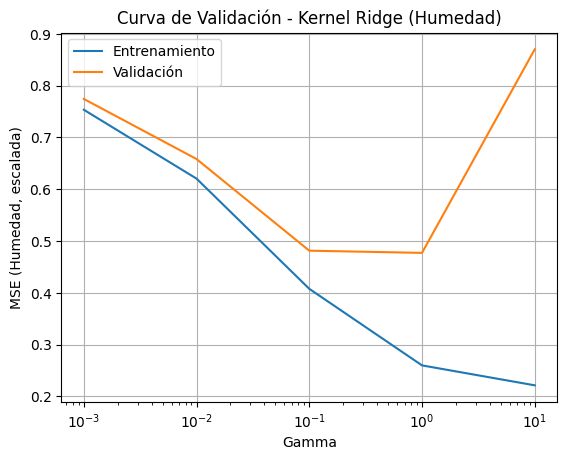

In [6]:
gammas = np.logspace(-3, 1, 5)
train_scores, val_scores = validation_curve(KernelRidge(kernel='rbf'), x_train, y_train.ravel(), param_name='gamma', param_range=gammas, cv=5, scoring='neg_mean_squared_error')
plt.semilogx(gammas, -train_scores.mean(axis=1), label='Entrenamiento')
plt.semilogx(gammas, -val_scores.mean(axis=1), label='Validación')
plt.xlabel('Gamma')
plt.ylabel('MSE (Humedad, escalada)')
plt.title('Curva de Validación - Kernel Ridge (Humedad)')
plt.legend()
plt.grid(True)
plt.show()

## Curva de paridad
Compara las predicciones de humedad con los valores reales (desescalados).

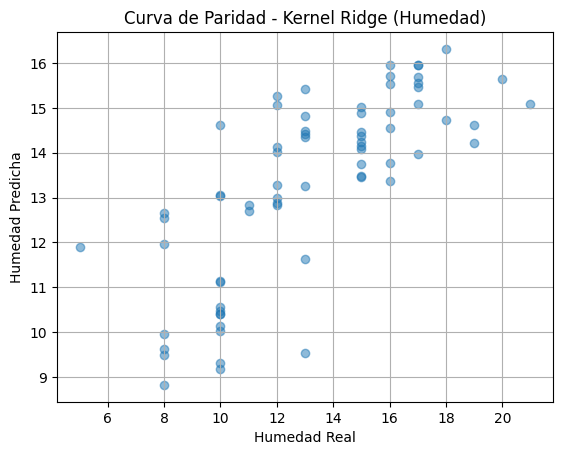

R^2 validación (Humedad): 0.533


In [7]:
rbf_model = KernelRidge(kernel='rbf', gamma=0.1)
rbf_model.fit(x_train, y_train)
y_val_pred = rbf_model.predict(x_val)
y_val_pred_inv = scaler_y.inverse_transform(y_val_pred.reshape(-1, 1))
y_val_inv = scaler_y.inverse_transform(y_val)
plt.scatter(y_val_inv, y_val_pred_inv, alpha=0.5)
plt.xlabel('Humedad Real')
plt.ylabel('Humedad Predicha')
plt.title('Curva de Paridad - Kernel Ridge (Humedad)')
plt.grid(True)
plt.show()
print(f'R^2 validación (Humedad): {r2_score(y_val_inv, y_val_pred_inv):.3f}')

## Curva de sesgo y varianza
Analiza la diferencia entre el error de entrenamiento y validación (desescalados).

In [8]:
y_train_pred = rbf_model.predict(x_train)
y_train_pred_inv = scaler_y.inverse_transform(y_train_pred.reshape(-1, 1))
y_train_inv = scaler_y.inverse_transform(y_train)
print(f'MSE Entrenamiento (Humedad): {mean_squared_error(y_train_inv, y_train_pred_inv):.3f}')
print(f'MSE Validación (Humedad): {mean_squared_error(y_val_inv, y_val_pred_inv):.3f}')
print(f'R^2 Entrenamiento (Humedad): {r2_score(y_train_inv, y_train_pred_inv):.3f}')
print(f'R^2 Validación (Humedad): {r2_score(y_val_inv, y_val_pred_inv):.3f}')

MSE Entrenamiento (Humedad): 4.560
MSE Validación (Humedad): 5.546
R^2 Entrenamiento (Humedad): 0.594
R^2 Validación (Humedad): 0.533


## Explicación breve
Kernel Ridge con RBF permite modelar relaciones no lineales, pero requiere escalado de variables. El desempeño se evalúa con las métricas y curvas anteriores.

## Actual vs Predicted (Kernel Ridge)
Gráfica de dispersión para comparar valores reales y predichos en entrenamiento y validación.

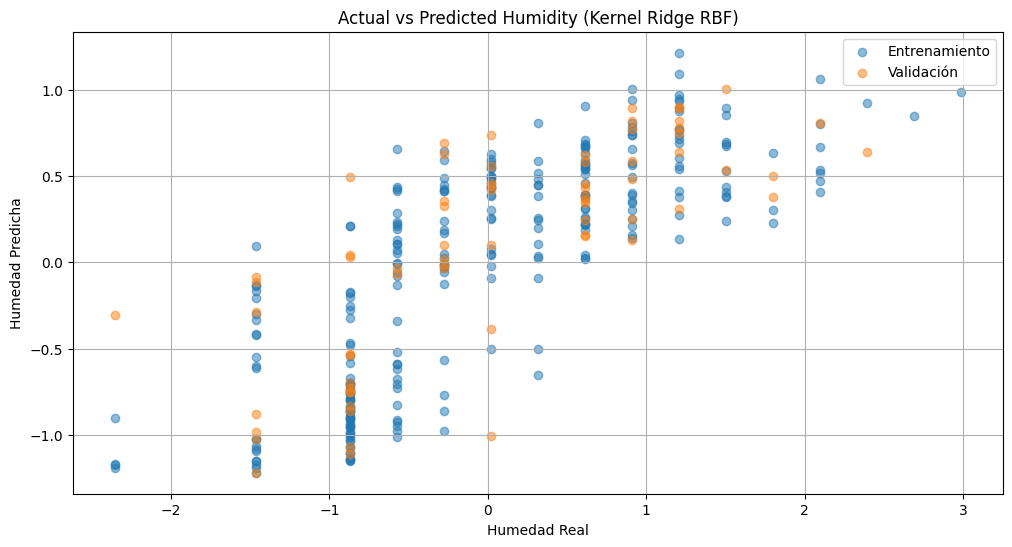

MSE Entrenamiento: 0.401
MSE Validación: 0.487
R^2 Entrenamiento: 0.594
R^2 Validación: 0.533


In [9]:
rbf_model = KernelRidge(kernel='rbf', gamma=0.1)
rbf_model.fit(x_train, y_train)
y_train_pred = rbf_model.predict(x_train)
y_val_pred = rbf_model.predict(x_val)
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Entrenamiento')
plt.scatter(y_val, y_val_pred, alpha=0.5, label='Validación')
plt.xlabel('Humedad Real')
plt.ylabel('Humedad Predicha')
plt.title('Actual vs Predicted Humidity (Kernel Ridge RBF)')
plt.legend()
plt.grid(True)
plt.show()
print(f'MSE Entrenamiento: {mean_squared_error(y_train, y_train_pred):.3f}')
print(f'MSE Validación: {mean_squared_error(y_val, y_val_pred):.3f}')
print(f'R^2 Entrenamiento: {r2_score(y_train, y_train_pred):.3f}')
print(f'R^2 Validación: {r2_score(y_val, y_val_pred):.3f}')

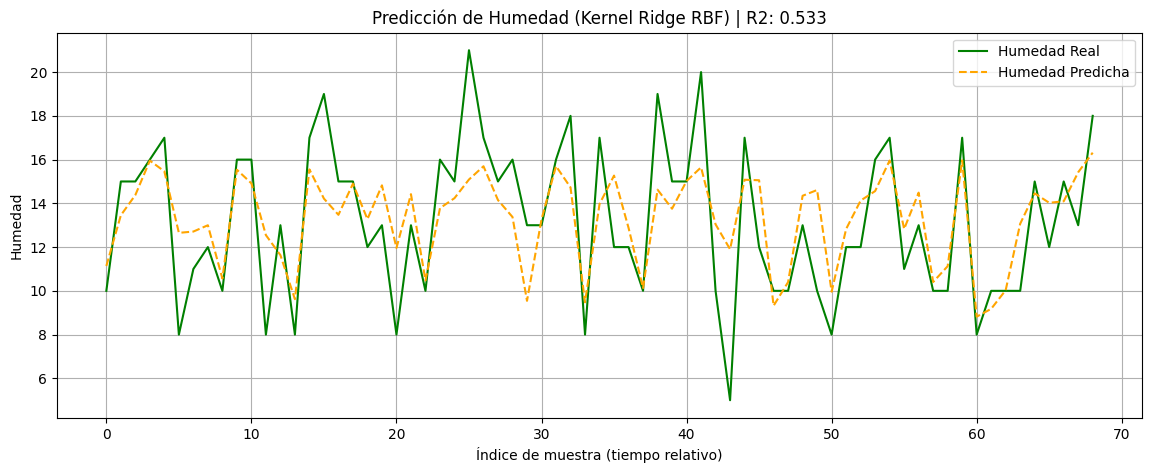

In [10]:
# Serie temporal: Humedad real vs predicha (validación, desescalada)
plt.figure(figsize=(14,5))
plt.plot(np.arange(len(y_val_inv)), y_val_inv, label='Humedad Real', color='green')
plt.plot(np.arange(len(y_val_pred_inv)), y_val_pred_inv, label='Humedad Predicha', color='orange', linestyle='--')
plt.xlabel('Índice de muestra (tiempo relativo)')
plt.ylabel('Humedad')
plt.title(f'Predicción de Humedad (Kernel Ridge RBF) | R2: {r2_score(y_val_inv, y_val_pred_inv):.3f}')
plt.legend()
plt.grid(True)
plt.show()